In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
y = boston.target
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bos['price'] = y

C:\Users\ClassRoom 2\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

In [3]:
y = bos['price']
X = bos['LSTAT']

### Gradient Descent Approach

m:  0.5094592088932806 C:  10.012412549407115


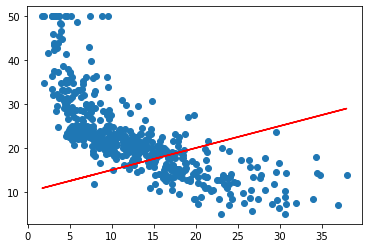

m:  -0.039099842039645456 C:  19.380761840702593


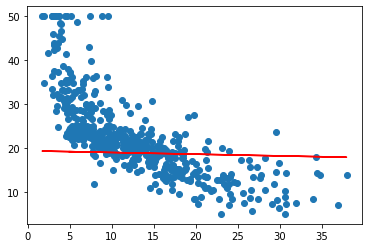

m:  -0.38682309107076135 C:  25.17255630709799


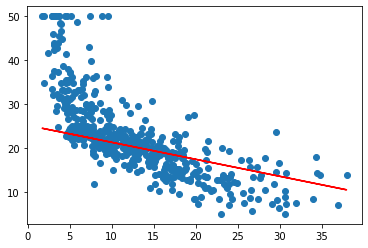

m:  -0.6018151004872049 C:  28.753534955856566


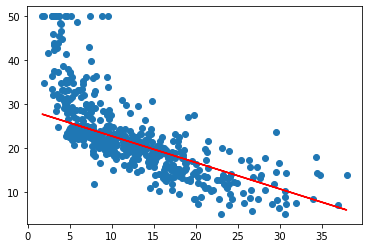

m:  -0.7347413981728267 C:  30.967599725811365


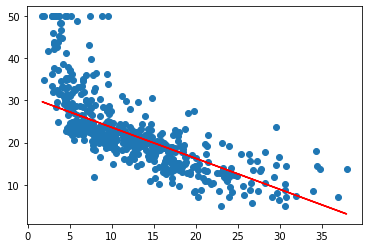

m:  -0.8169277113496061 C:  32.33652238254208


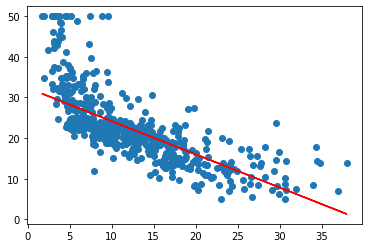

m:  -0.8677422619027859 C:  33.18290649268233


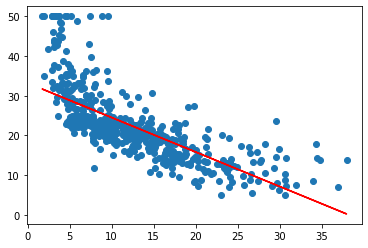

m:  -0.8991601275803366 C:  33.70621294712336


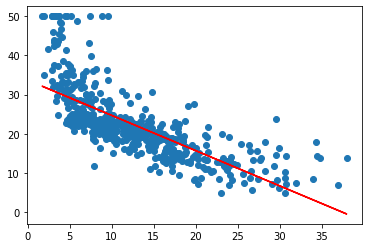

m:  -0.918585317274765 C:  34.02976538859617


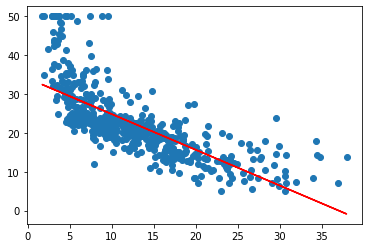

m:  -0.9305956173548912 C:  34.22981295440502


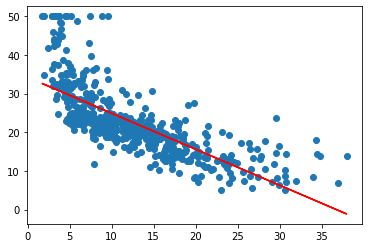

In [5]:
m=0.5
C=10
epochs=10000
LR=0.001
n=len(y)
for i in range(epochs):
    y_pred = C+m*X
    D_m = -(2/n)*sum(X*(y-y_pred))
    D_c = -(2/n)*sum(y-y_pred)
    m = m-LR*D_m
    C = C-LR*D_c
    if (i%1000)==0:
        print('m: ', m, 'C: ', C)
        plt.scatter(X, y)
        plt.plot(X, y_pred, 'r')
        plt.show()

### Train Test Split

In [6]:
y = bos['price']
X = bos.drop('price', axis=1)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,\
                                                    random_state=42)
lir = LinearRegression()
lir.fit(X_train, y_train)
y_train_pred = lir.predict(X_train)
y_test_pred = lir.predict(X_test)

print('r2 Train: ', r2_score(y_train, y_train_pred))
print('rmse Train: ', np.sqrt(mean_squared_error(y_train, y_train_pred)))

print('r2 Test: ', r2_score(y_test, y_test_pred))
print('rmse Test: ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

r2 Train:  0.7434997532004697
rmse Train:  4.748208239685937
r2 Test:  0.7112260057484903
rmse Test:  4.6386899261728445


### Cross Validation

In [16]:
from sklearn.model_selection import KFold
kf = KFold(shuffle=True, n_splits=5, random_state=4)
i=1
for train_index, test_index in kf.split(y):
    X_train = X.iloc[train_index]
    y_train = y[train_index]
    X_test = X.iloc[test_index]
    y_test = y[test_index]
    
    lir = LinearRegression()
    lir.fit(X_train, y_train)
    y_train_pred = lir.predict(X_train)
    y_test_pred = lir.predict(X_test)
    
    print('fold: ', i, 'r2 Train: ', r2_score(y_train, y_train_pred))
    print('fold: ', i,'rmse Train: ', np.sqrt(mean_squared_error(y_train, y_train_pred)))

    print('fold: ', i,'r2 Test: ', r2_score(y_test, y_test_pred))
    print('fold: ', i,'rmse Test: ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
    print('\n')
    i+=1

fold:  1 r2 Train:  0.7415244219726307
fold:  1 rmse Train:  4.604035178213393
fold:  1 r2 Test:  0.7263451459702517
fold:  1 rmse Test:  5.041784121402044


fold:  2 r2 Train:  0.7401692005248535
fold:  2 rmse Train:  4.383892879248188
fold:  2 r2 Test:  0.7335055965948257
fold:  2 rmse Test:  5.802461831824111


fold:  3 r2 Train:  0.7390169106490991
fold:  3 rmse Train:  4.846747720170457
fold:  3 r2 Test:  0.7405037856708773
fold:  3 rmse Test:  3.9917539174800694


fold:  4 r2 Train:  0.7335004839380233
fold:  4 rmse Train:  4.882840011748117
fold:  4 r2 Test:  0.7703314589608892
fold:  4 rmse Test:  3.836529082565595


fold:  5 r2 Train:  0.7563209151603549
fold:  5 rmse Train:  4.592549898542688
fold:  5 r2 Test:  0.6629289207785671
fold:  5 rmse Test:  5.056636858968739




In [17]:
### Application of Cross Val Score
from sklearn.model_selection import cross_val_score
lir = LinearRegression()
kf = KFold(shuffle=True, n_splits=5, random_state=4)
cvs = cross_val_score(lir, X, y, cv=kf, scoring='r2')
cvs

array([0.72634515, 0.7335056 , 0.74050379, 0.77033146, 0.66292892])

In [19]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

### Leave One out Cross Validation (LOOCV)

In [25]:
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()
cvs = cross_val_score(lir, X,y, cv=loocv, scoring='neg_root_mean_squared_error')
cvs = -1*cvs.mean()
cvs

3.3827965268794715

#### How cross vlidation create folds?

In [31]:
kf = KFold(n_splits=5)
y = [1,2,3,4,5,6,7,8,9,10]
X = [10,20,30,40,50,60,70,80,90,100]

for train_index, test_index in kf.split(y):
    X_train = np.array(X)[train_index]
    y_train = np.array(y)[train_index]    
    X_test = np.array(X)[test_index]
    y_test = np.array(y)[test_index]    
    
    print('X_train: ', X_train, 'y_train: ', y_train)
    print('X_test: ', X_test, 'y_test: ', y_test)
    print('\n')

X_train:  [ 30  40  50  60  70  80  90 100] y_train:  [ 3  4  5  6  7  8  9 10]
X_test:  [10 20] y_test:  [1 2]


X_train:  [ 10  20  50  60  70  80  90 100] y_train:  [ 1  2  5  6  7  8  9 10]
X_test:  [30 40] y_test:  [3 4]


X_train:  [ 10  20  30  40  70  80  90 100] y_train:  [ 1  2  3  4  7  8  9 10]
X_test:  [50 60] y_test:  [5 6]


X_train:  [ 10  20  30  40  50  60  90 100] y_train:  [ 1  2  3  4  5  6  9 10]
X_test:  [70 80] y_test:  [7 8]


X_train:  [10 20 30 40 50 60 70 80] y_train:  [1 2 3 4 5 6 7 8]
X_test:  [ 90 100] y_test:  [ 9 10]


